In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
BASE_DIR=os.getcwd()
RELATIVE="/Historicaldata/ICICIBANK-2015-19.csv"
RELATIVE2="/Historicaldata/2018/ICICIBANK-2018.csv"
RELATIVE3="/Historicaldata/BITFINEX-BTCEUR.csv"
RELATIVE4="/Historicaldata/ICICIBANK.csv"
DIR=BASE_DIR + RELATIVE4

In [5]:
df=pd.read_csv(DIR)
# df.rename(columns={'High':'Open'},inplace=True)

In [6]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-10,149.600006,151.673004,148.000000,150.735992,87.830688,19786860.0
1,2010-06-11,153.636002,154.544998,151.235992,153.817993,89.626503,20875124.0
2,2010-06-14,155.455002,156.182007,153.345001,155.209000,90.437012,15172570.0
3,2010-06-15,155.209000,157.244995,152.600006,156.382004,91.120491,14494937.0
4,2010-06-16,158.000000,159.981995,156.373001,159.408997,92.884247,20689290.0
5,2010-06-17,159.636002,162.164001,153.817993,160.699997,93.636520,64208595.0
6,2010-06-18,159.291000,160.908997,157.100006,158.054993,92.095299,17517863.0
7,2010-06-21,159.800003,165.455002,159.199997,163.600006,95.326263,28587961.0
8,2010-06-22,163.091003,164.690994,161.526993,162.108994,94.457489,18128176.0
9,2010-06-23,161.108994,164.490997,160.281998,163.709000,95.389786,17704599.0


In [7]:
df_open=df.loc[:,["Open"]]
df_open.shape

(2232, 1)

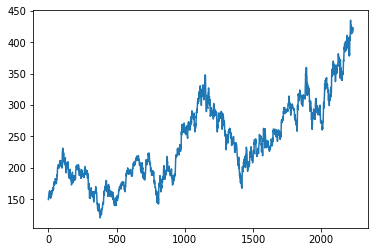

In [10]:
plt.plot(df_open["Open"])

In [162]:
# df.rename(columns={'High':'Open'},inplace=True)
def SMA(df,x):
    if not (len(df.columns)==1):
        print("Check the dimension")
        return
    zero_data=np.zeros(shape=(df.size,1))
    df_sma=pd.DataFrame(zero_data,columns=df.columns)

    for i in range(0,df_sma.size):
        if x==1:
            ma=df.iloc[i,0]
        if i<x-1:
            ma=df.iloc[:i,0].mean()
            df_sma.iloc[i,0]=ma
        else:    
            df_sma.iloc[i,0]=ma
            try:
                ma=ma -df.iloc[i-x+1,0]/x+df.iloc[i+1,0]/x
            except:
                pass

    return df_sma
            
    
    

In [163]:
def EMA(df,x,s=2):
    if not (len(df.columns)==1):
        print("Check the dimension")
        return
    zero_data=np.zeros(shape=(df.size,1))
    df_ema=pd.DataFrame(zero_data,columns=df.columns)

    for i in range(0,df_ema.size):
        if x==1:
            ema=df.iloc[i,0]
        elif i<x-1:
            ema=df.iloc[:i,0].mean()
            df_ema.iloc[i,0]=ema
        else:    
            ema=df.iloc[i,0]*s/(x+1) + df_ema.iloc[i-1,0]*(1-s/(x+1))
            df_ema.iloc[i,0]=ema

    return df_ema
            

In [164]:
df_sma=SMA(df_open,13)
df_ema=EMA(df_open,13,2)

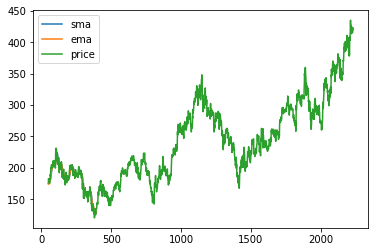

In [165]:
plt.plot(df_sma.loc[50:,["Open"]],label="sma")
plt.plot(df_ema.loc[50:,["Open"]],label="ema")
plt.plot(df.loc[50:,["Open"]],label="price")

plt.legend()


In [166]:
df_sma.shape

(2232, 1)

In [167]:
def profit_sma(start,end,initial=100000):
    crossing=[]
    profit=0
    i=start

    while i<end:
        if(df_sma.iloc[i,0]<df_open.iloc[i,0]):
    #         BuyIng Point
            t0=i
            shares=initial/df_open.iloc[i,0]
            while(df_sma.iloc[i,0]<df_open.iloc[i,0] and i<end):
                i=i+1
            profit+=(df_open.iloc[i,0]-df_open.iloc[t0,0])*shares
            crossing.append([t0,i])
            t0=i
        i=i+1

    if(df_open.iloc[i,0]>df_open.iloc[t0,0]):
        profit+=(df_open.iloc[i,0]-df_open.iloc[t0,0])*shares
    print(len(crossing))

    print("Profit Earned in sma: %s (%s%%)" % (profit,profit/initial*100))       

In [168]:
def profit_ema(start,end,initial=100000):
    crossing=[]
    profit=0
    i=start

    while i<end:
        if(df_ema.iloc[i,0]<df_open.iloc[i,0]):
    #         BuyIng Point
            t0=i
            shares=initial/df_open.iloc[i,0]
            while(df_ema.iloc[i,0]<df_open.iloc[i,0] and i<end):
                i=i+1
            profit+=(df_open.iloc[i,0]-df_open.iloc[t0,0])*shares
            crossing.append([t0,i])
            t0=i
        i=i+1

    if(df_open.iloc[i,0]>df_open.iloc[t0,0]):
        profit+=(df_open.iloc[i,0]-df_open.iloc[t0,0])*shares
        print(len(crossing))

        print("Profit Earned in ema: %s (%s%%)" % (profit,profit/initial*100))          

In [169]:
profit_ema(50,500)

In [170]:
profit_sma(50,500)

30
Profit Earned in sma: nan (nan%)


In [171]:
class EMA():
    def __init__(self,days=20,smoothing=2):
        self.x=days
        self.s=smoothing
    def model(self,df):
        if not len(df.columns)==1:
            raise ValueError("Number of Columns should be one")
        
        zero_data=np.zeros(shape=(df.size,1))
        df_ema=pd.DataFrame(zero_data,columns=df.columns)

        for i in range(0,df_ema.size):
            if self.x==1:
                ema=df.iloc[i,0]
            elif i<self.x-1:
                ema=df.iloc[:i,0].mean()
                df_ema.iloc[i,0]=ema
            else:    
                ema=df.iloc[i,0]*self.s/(self.x+1) + df_ema.iloc[i-1,0]*(1-self.s/(self.x+1))
                df_ema.iloc[i,0]=ema
        self.df_ema=df_ema
        
    def model_profit_history(self,df,start,end,initial=100000):
        crossing=[]
        profit=0
        i=start
        self.model(df)
        if(end>self.df_ema.size):
            raise ValueError("Data not available for given range")

        while i<end:
            if(self.df_ema.iloc[i,0]<df.iloc[i,0]):
        #         BuyIng Point
                t0=i
                shares=initial/df.iloc[i,0]
                while(self.df_ema.iloc[i,0]<df.iloc[i,0] and i<end):
                    i=i+1
                profit+=(df.iloc[i,0]-df.iloc[t0,0])*shares
                crossing.append([t0,i])
                t0=i
            else:
                i=i+1

#         if(df.iloc[i,0]>df.iloc[t0,0]):
#             profit+=(df.iloc[i,0]-df.iloc[t0,0])*shares
        print(len(crossing))

        print("Profit Earned in ema: %s (%s%%)" % (profit,profit/initial*100))

        

In [172]:
s=EMA()

In [173]:
s.model(df_open)

In [174]:
s.model_profit_history(df_open,50,500)

32
Profit Earned in ema: nan (nan%)


In [20]:
class SMA():
    def __init__(self,days=20):
        self.x=days
    def model(self,df):
        if not len(df.columns)==1:
            raise ValueError("Number of Columns should be one")
        
        zero_data=np.zeros(shape=(df.size,1))
        df_sma=pd.DataFrame(zero_data,columns=df.columns)

        for i in range(0,df_sma.size):
            if self.x==1:
                ma=df.iloc[i,0]
            if i<self.x-1:
                ma=df.iloc[:i,0].mean()
                df_sma.iloc[i,0]=ma
            else:    
                df_sma.iloc[i,0]=ma
                try:
                    ma=ma -df.iloc[i-self.x+1,0]/self.x+df.iloc[i+1,0]/self.x
                except:
                    pass
            self.df_sma=df_sma
        
    def model_profit_history(self,df,start,end,initial=100000):
        crossing=[]
        profit=0
        i=start
        self.model(df)
        if(end>self.df_sma.size):
            raise ValueError("Data not available for given range")

        while i<end:
            if(self.df_sma.iloc[i,0]<df.iloc[i,0]):
        #         BuyIng Point
                t0=i
                shares=initial/df.iloc[i,0]
                while(self.df_sma.iloc[i,0]<df.iloc[i,0] and i<end):
                    i=i+1
                profit+=(df.iloc[i,0]-df.iloc[t0,0])*shares
                crossing.append([t0,i])
#                 t0=i
#             i=i+1
            else:
                i=i+1
#         if(df.iloc[i,0]>df.iloc[t0,0]):
#             profit+=(df.iloc[i,0]-df.iloc[t0,0])*shares
        print(len(crossing))

        print("Profit Earned in sma: %s (%s%%)" % (profit,profit/initial*100))

        

In [21]:
s2=SMA(26)

In [22]:
s2.model(df_open)

In [23]:
s2.model_profit_history(df_open,50,800)

38
Profit Earned in sma: -34563.5818882188 (-34.563581888218806%)


In [175]:
class CCIAGent:
    def __init__(self,days=20):
        self.x=days
    def model(self,df):
        self.df=df
        df_cci=(df-df.rolling(self.x).mean())/(0.015*df.rolling(self.x).std())
        self.df_cci=df_cci
                
    def model_cci_history(self,start,end,initial=100000):
        crossing=[]
        profit=0
        i=start
        if(end>self.df.size):
            raise ValueError("Data not available for given range")
        while i<end:
            if(self.df_cci.iloc[i,0]=="NaN"):
                i=i+1
                continue
            if(self.df_cci.iloc[i,0]>=100):
                t0=i
                shares=initial/self.df.iloc[i,0]
                while(self.df_cci.iloc[i,0]>=-100 and i<end):
                    i=i+1
                profit+=(self.df.iloc[i,0]-self.df.iloc[t0,0])*shares
                i=i+1
            else:
                i=i+1
        print("Profit Earned in CCI: %s (%s%%)" % (profit,profit/initial*100))
        
        

In [176]:
s3=CCIAGent(50)

In [177]:
s3.model(df_open)

In [178]:
s3.model_cci_history(50,500)

Profit Earned in CCI: -18453.13309906322 (-18.45313309906322%)


In [179]:
[-1]plt.plot(df_open.loc[50:,["Open"]],label="price")
plt.plot(s3.df_cci.loc[50:,["Open"]],label="ema")
# plt.plot(df.loc[50:,["Open"]],label="price")

plt.legend()

SyntaxError: invalid syntax (<ipython-input-179-bf1e864d33ec>, line 1)

In [180]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-10,149.600006,151.673004,148.000000,150.735992,87.830688,19786860.0
1,2010-06-11,153.636002,154.544998,151.235992,153.817993,89.626503,20875124.0
2,2010-06-14,155.455002,156.182007,153.345001,155.209000,90.437012,15172570.0
3,2010-06-15,155.209000,157.244995,152.600006,156.382004,91.120491,14494937.0
4,2010-06-16,158.000000,159.981995,156.373001,159.408997,92.884247,20689290.0


In [181]:
period9_high = df["High"].rolling(9).max()
period9_low = df["Low"].rolling(9).min()
tenkan_sen = (period9_high + period9_low) / 2

# Kijun-sen (Base Line): (26-period high + 26-period low)/2))
period26_high = df["High"].rolling(26).max()
period26_low = df["Low"].rolling(26).min()
kijun_sen = (period26_high + period26_low) / 2

# Senkou Span A (Leading Span A): (Conversion Line + Base Line)/2))
senkou_span_a = ((tenkan_sen + kijun_sen) / 2).shift(26)

# Senkou Span B (Leading Span B): (52-period high + 52-period low)/2))
period52_high = df["High"].rolling(52).max()
period52_low = df["Low"].rolling(52).min()
senkou_span_b = ((period52_high + period52_low) / 2).shift(26)

[]

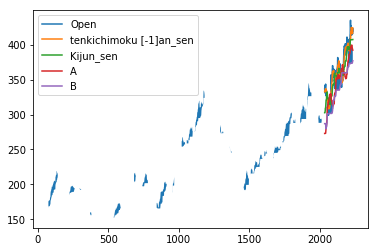

In [182]:
plt.plot(df["Open"].tail(200),label="Open")
plt.plot(tenkan_sen.tail(200),label="tenkichimoku [-1]an_sen")
plt.plot(kijun_sen.tail(200),label="Kijun_sen")
plt.plot(senkou_span_a.tail(200),label="A")
plt.plot(senkou_span_b.tail(200),label="B")
# if()
plt.fill_between(df.index,senkou_span_a,senkou_span_b,senkou_span_a>senkou_span_b)

plt.legend()
# plt.figure(figsize=(20,9))

plt.plot(figsize=(15,10))



In [27]:
class ICHIMOKU:
    def init(self):
        pass
    def model(self,df):
        self.ichimoku=df.copy()
        period9_high = df["High"].rolling(9).max()
        period9_low = df["Low"].rolling(9).min()
        self.ichimoku["tenkan_sen"] = (period9_high + period9_low) / 2
        # Kijun-sen (Base Line): (26-period high + 26-period low)/2))
        period26_high = df["High"].rolling(26).max()
        period26_low = df["Low"].rolling(26).min()
        self.ichimoku["kijun_sen"] = (period26_high + period26_low) / 2
        # Senkou Span A (Leading Span A): (Conversion Line + Base Line)/2))
        self.ichimoku["senkou_span_a"]= ((self.ichimoku["tenkan_sen"] + self.ichimoku["kijun_sen"]) / 2).shift(26)
        # Senkou Span B (Leading Span B): (52-period high + 52-period low)/2))
        period52_high = df["High"].rolling(52).max()
        period52_low = df["Low"].rolling(52).min()
        self.ichimoku["senkou_span_b"] = ((period52_high + period52_low) / 2).shift(26)
        self.flag=0
    
    def current(self):
        last = self.ichimoku.shape[0]-1
        if(self.flag==0 and self.ichimoku.loc[last,"Open"]>=self.ichimoku.loc[last,"senkou_span_a"] and self.ichimoku.loc[last,"Open"]>=self.ichimoku.loc[last,"senkou_span_b"]):
            self.flag=1
            print("Buy")
        elif(self.flag==1 and self.ichimoku.loc[last,"Open"] >= self.ichimoku.loc[last,"kijun_sen"]):
            print("HOld")
        elif(self.flag==1 and self.ichimoku.loc[last,"Open"] < self.ichimoku.loc[last,"kijun_sen"]):
            print("Sell")
            self.flag=0
    def model_history(self,start,end,initial):
        flag=0
        profit=0
        while(start<end):
            if((self.ichimoku.loc[start,"senkou_span_a"]>self.ichimoku.loc[start,"senkou_span_b"]  and self.ichimoku.loc[start,"Open"]>self.ichimoku.loc[start,"senkou_span_a"])):
                stocks_bought=initial/(self.ichimoku.loc[start,"Open"])
                buy_price=self.ichimoku.loc[start,"Open"]
                while(start<end and self.ichimoku.loc[start,"Open"] > self.ichimoku.loc[start-1,"kijun_sen"] and (self.ichimoku.loc[start,"senkou_span_a"]>self.ichimoku.loc[start,"senkou_span_b"])):
                    if(self.ichimoku.loc[start,"Open"]<self.ichimoku.loc[start-1,"kijun_sen"] ):
#                         print(start)
                        break
                    start=start+1
                print(buy_price,self.ichimoku.loc[start,"Open"],start)
                profit+=(self.ichimoku.loc[start,"Open"]-buy_price)*stocks_bought
            start=start+1
        print("Profit Earned in ICHIMOKU: %s (%s%%)" % (profit,profit/initial*100))       
                
        
        
        
        

In [28]:
s4=ICHIMOKU()
s4.model(df)

In [29]:
s4.current()

Buy


In [30]:
df.loc[992,'Open']

263.091003

In [31]:
df.shape[0]-1

2231

In [36]:
s4.model_history(1600,2000,100000)

242.044998 242.044998 1602
251.81799300000003 251.09100299999997 1669
249.09100299999997 249.09100299999997 1670
250.136002 250.136002 1671
255.544998 250.90899700000003 1677
254.544998 249.955002 1697
254.727005 250.81799300000003 1705
265.091003 293.635986 1725
292.72699 291.864014 1730
289.954987 290.0 1749
294.0 289.700012 1754
295.600006 298.850006 1767
303.899994 295.0 1771
297.25 297.25 1772
299.799988 299.799988 1773
294.399994 294.399994 1774
291.700012 291.899994 1801
293.200012 299.799988 1826
298.600006 303.0 1830
312.049988 312.049988 1859
308.0 308.0 1860
303.850006 303.850006 1861
310.399994 310.399994 1862
309.200012 309.200012 1864
314.100006 327.600006 1896
315.25 315.25 1897
335.350006 335.350006 1898
332.549988 332.549988 1899
325.0 325.0 1900
328.850006 328.850006 1901
317.0 317.0 1908
325.0 325.0 1910
327.0 327.0 1911
295.5 295.5 1987
299.799988 287.549988 1992
Profit Earned in ICHIMOKU: 5761.383542215897 (5.7613835422158965%)


<Figure size 288x144 with 0 Axes>

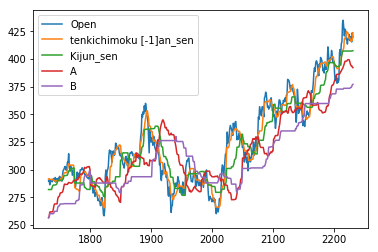

<Figure size 288x144 with 0 Axes>

In [202]:
plt.plot(s4.ichimoku["Open"].tail(500),label="Open")
plt.plot(s4.ichimoku["tenkan_sen"].tail(500),label="tenkichimoku [-1]an_sen")
plt.plot(s4.ichimoku["kijun_sen"].tail(500),label="Kijun_sen")
plt.plot(s4.ichimoku["senkou_span_a"].tail(500),label="A")
plt.plot(s4.ichimoku["senkou_span_b"].tail(500),label="B")
# if()
# plt.fill_between(df.index,senkou_span_a,senkou_span_b,senkou_span_a>senkou_span_b)

plt.legend()
plt.figure(figsize=(4,2))

# plt.plot(figsize=(15,10))